In [145]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
import seaborn as sns
from geopy.distance import geodesic
from statsmodels.robust.robust_linear_model import RLM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import r2_score
sns.set()

# Loading the Data

In [108]:
data = pd.read_excel("C:\\Users\\DU952LT\\OneDrive - EY\\Desktop\\SDA\\Classical ML\\Big Project\\Apartments_Data (1).xlsx")

# Preprocessing 

### Descriptive Statistics

In [109]:
display(data.describe(include='all'))
display(data.describe())

,gross_area,year,floor,bathrooms,bedrooms,furnished,balcony,mortgage,status,address,...,air_conditioner,chimney,natural_light,termoizolation,capot_system,acoustic,façade,solar_panel,Area,price
count,3840.000000,3837.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840,3840,...,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pallat I ri,"astir tirane,Tirana,Albania",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1963,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.788424,2002.859004,4.296615,1.440104,1.891146,0.263802,0.692187,0.554167,NaN,NaN,...,0.073438,0.025781,0.198958,0.091667,0.049479,0.100260,0.072656,0.006771,3.601042,121405.256250
std,39.504726,16.622352,2.508187,0.529471,0.713524,0.440751,0.461649,0.497122,NaN,NaN,...,0.260887,0.158503,0.399269,0.288592,0.216895,0.300386,0.259605,0.082017,0.917940,75732.312336
min,35.600000,1940.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,27000.000000
25%,75.000000,1985.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,72178.000000
50%,100.000000,2007.000000,4.000000,1.000000,2.000000,0.000000,1.000000,1.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,99960.000000
75%,120.000000,2018.000000,6.000000,2.000000,2.000000,1.000000,1.000000,1.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,145000.000000


,gross_area,year,floor,bathrooms,bedrooms,furnished,balcony,mortgage,lat,lon,...,air_conditioner,chimney,natural_light,termoizolation,capot_system,acoustic,façade,solar_panel,Area,price
count,3840.000000,3837.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,...,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000
mean,103.788424,2002.859004,4.296615,1.440104,1.891146,0.263802,0.692187,0.554167,41.327820,19.811854,...,0.073438,0.025781,0.198958,0.091667,0.049479,0.100260,0.072656,0.006771,3.601042,121405.256250
std,39.504726,16.622352,2.508187,0.529471,0.713524,0.440751,0.461649,0.497122,0.014814,0.026519,...,0.260887,0.158503,0.399269,0.288592,0.216895,0.300386,0.259605,0.082017,0.917940,75732.312336
min,35.600000,1940.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.223616,19.472016,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,27000.000000
25%,75.000000,1985.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.321156,19.794840,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,72178.000000
50%,100.000000,2007.000000,4.000000,1.000000,2.000000,0.000000,1.000000,1.000000,41.329917,19.810961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,99960.000000
75%,120.000000,2018.000000,6.000000,2.000000,2.000000,1.000000,1.000000,1.000000,41.336561,19.828552,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,145000.000000
max,422.000000,2025.000000,20.000000,4.000000,6.000000,1.000000,1.000000,1.000000,41.383976,19.905172,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1000000.000000


### Dealing with missing values

In [110]:
# Checking if we have any null data
data.isnull().sum()

gross_area             0
year                   3
floor                  0
bathrooms              0
bedrooms               0
furnished              0
balcony                0
mortgage               0
status                 0
address                0
comments               0
lat                    0
lon                    0
orientation            0
storehouse             0
parquet                0
surveillance_system    0
air_conditioner        0
chimney                0
natural_light          0
termoizolation         0
capot_system           0
acoustic               0
façade                 0
solar_panel            0
Area                   0
price                  0
dtype: int64

In [111]:
# Dropping the null data
data = data.dropna(axis=0)

In [112]:
# Checking the data
data.isnull().sum()

gross_area             0
year                   0
floor                  0
bathrooms              0
bedrooms               0
furnished              0
balcony                0
mortgage               0
status                 0
address                0
comments               0
lat                    0
lon                    0
orientation            0
storehouse             0
parquet                0
surveillance_system    0
air_conditioner        0
chimney                0
natural_light          0
termoizolation         0
capot_system           0
acoustic               0
façade                 0
solar_panel            0
Area                   0
price                  0
dtype: int64

# Adding new Columns on Distance, Park & Elevator 

In [113]:
from geopy.distance import geodesic

qendra = (41.327967, 19.818919)

# Calculate distance for each data point
data['distance_from_center'] = data.apply(lambda row: geodesic(qendra, (row['lat'], row['lon'])).kilometers, axis=1)


In [114]:
# Adding a new column of price per meter2
data['P/Meter'] = data['price']/data['gross_area']


In [115]:
# Creating a new column 'Has_Parking' based on whether 'parkim' is mentioned in the comments column.
data['Has_Parking'] = data['comments'].str.contains('park', case=False)

# Creating a new column 'Has_Elevator' based on whether 'ashensor' is mentioned in the comments column.
data['Has_Elevator'] = data['comments'].str.contains('ashensor', case=False)


# 2.0 Exploring all the PDFs

## 2.1 Via Regression

In [116]:
# Displaying all the features we have available
data.columns

Index(['gross_area', 'year', 'floor', 'bathrooms', 'bedrooms', 'furnished',
       'balcony', 'mortgage', 'status', 'address', 'comments', 'lat', 'lon',
       'orientation', 'storehouse', 'parquet', 'surveillance_system',
       'air_conditioner', 'chimney', 'natural_light', 'termoizolation',
       'capot_system', 'acoustic', 'façade', 'solar_panel', 'Area', 'price',
       'distance_from_center', 'P/Meter', 'Has_Parking', 'Has_Elevator'],
      dtype='object')

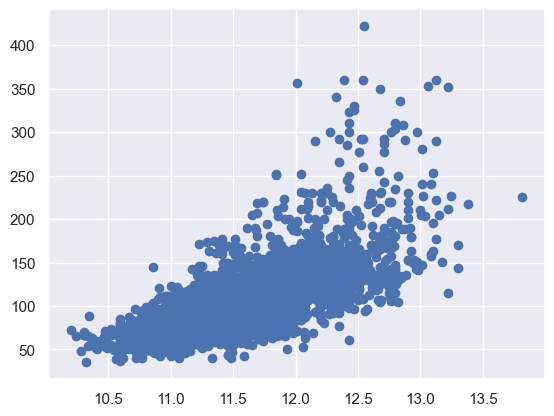

In [117]:
log_price = np.log(data['price'])

plt.scatter(log_price, data['gross_area'])

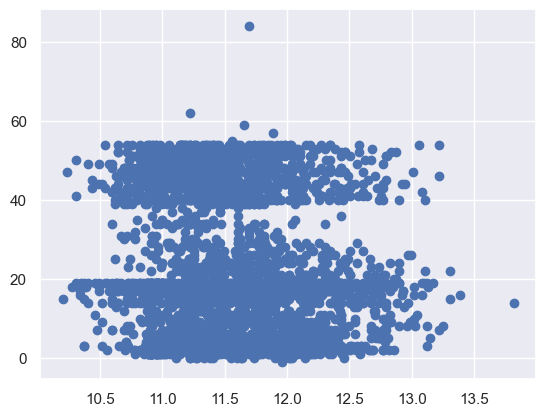

In [118]:
vjetersia = 2024 - data['year']
plt.scatter(log_price, vjetersia)

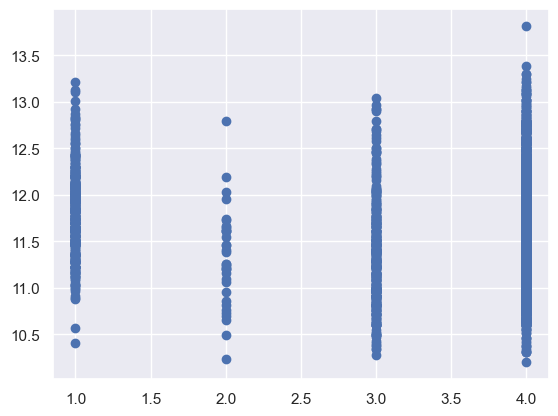

In [119]:
plt.scatter(data['Area'], log_price )

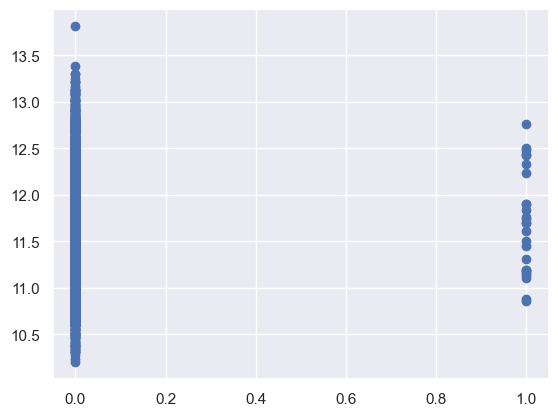

In [120]:
plt.scatter(data['solar_panel'], log_price )

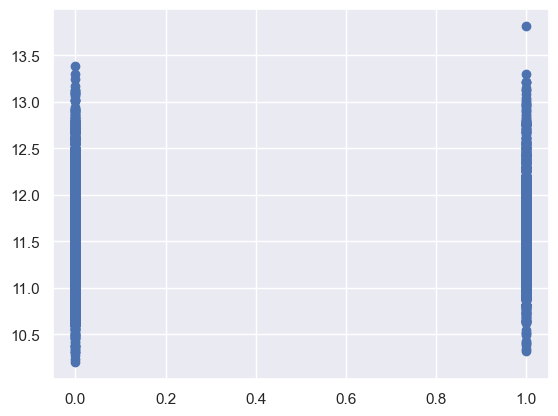

In [121]:
plt.scatter(data['furnished'], log_price )

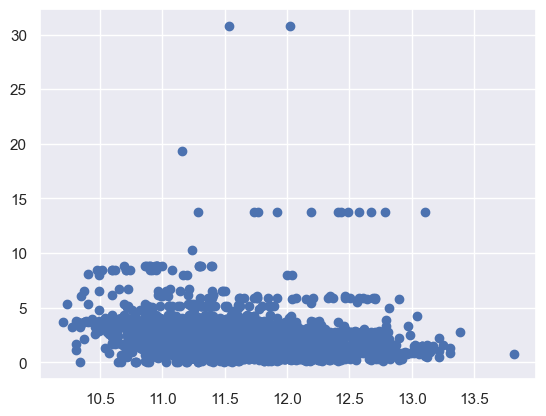

In [122]:

plt.scatter(log_price, data['distance_from_center'],  )

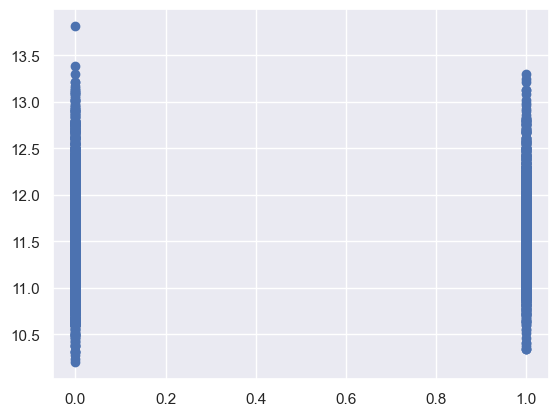

In [123]:
plt.scatter(data['Has_Elevator'], log_price )

In [124]:
data

,gross_area,year,floor,bathrooms,bedrooms,furnished,balcony,mortgage,status,address,...,capot_system,acoustic,façade,solar_panel,Area,price,distance_from_center,P/Meter,Has_Parking,Has_Elevator
0,110.0,1998.0,1,1,2,1,1,1,pallat I vjeter,"Sheshi Willson - Rruga ""Zef Jubani"" - Tirana e...",...,0,0,0,0,4,170000,1.115610,1545.454545,False,False
1,160.0,2000.0,1,2,3,0,0,0,pallat I vjeter,"Myslym Shyri - Myslym Shyri - Myslym Shyri, Sh...",...,0,0,0,0,4,224000,0.623884,1400.000000,False,False
2,126.5,2021.0,2,1,2,1,1,1,pallat I ri,"Liqeni i Thate - Liqeni i Thatë, Shqipëri",...,0,0,0,0,4,195000,2.769961,1541.501976,True,True
3,130.5,2021.0,2,2,2,0,1,1,I PaPerfunduar,"Rruga e Dafinave - Fusha e Aviacionit, Shqipëri",...,0,0,1,0,4,156000,2.751477,1195.402299,True,True
4,131.7,2021.0,2,2,2,0,1,1,I PaPerfunduar,"Rruga e Dafinave - Fusha e Aviacionit, Shqipëri",...,0,0,1,0,4,159000,2.751477,1207.289294,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,93.0,1977.0,5,1,2,0,1,0,pallat I vjeter,"Sheshi Willson, Tirana",...,0,0,0,0,1,135000,1.115610,1451.612903,False,False
3836,139.0,2007.0,3,2,2,1,1,1,pallat I ri,"Air Albania Stadium, Sheshi Italia, Tirana",...,0,0,0,0,1,238000,1.128541,1712.230216,False,False
3837,135.0,1977.0,4,2,3,1,1,1,pallat I vjeter,EJA Studio Tirana,...,0,0,0,0,3,120000,3.202303,888.888889,False,False
3838,76.0,2006.0,7,1,1,0,1,0,pallat I ri,"Dogana, Tirana",...,0,1,1,0,4,68400,3.006369,900.000000,False,False


# Running a Robust Regression to clean Outliers

In [125]:
data = data.dropna(axis=0)
data.isnull().sum()

gross_area              0
year                    0
floor                   0
bathrooms               0
bedrooms                0
furnished               0
balcony                 0
mortgage                0
status                  0
address                 0
comments                0
lat                     0
lon                     0
orientation             0
storehouse              0
parquet                 0
surveillance_system     0
air_conditioner         0
chimney                 0
natural_light           0
termoizolation          0
capot_system            0
acoustic                0
façade                  0
solar_panel             0
Area                    0
price                   0
distance_from_center    0
P/Meter                 0
Has_Parking             0
Has_Elevator            0
dtype: int64

In [126]:
# Add a constant term for the intercept & define the x and y terms
x = sm.add_constant(data['gross_area'])
y = data['price']

# Fit the robust linear model
robust_model = RLM(y, sm.add_constant(x)).fit()

# getting the residuals
robust_residuals = robust_model.resid

# Calculate the median absolute deviation (MAD)
MAD = np.median(np.abs(robust_residuals))

# Set a threshold for outliers
threshold = 2 * MAD  # Adjust as needed

# Identify outliers based on the threshold
outliers = np.abs(robust_residuals) > threshold

# Remove outliers from the DataFrame
df_filtered = data[~outliers]

# Now, df_filtered contains only the points that belong to the robust regression function
df_filtered

,gross_area,year,floor,bathrooms,bedrooms,furnished,balcony,mortgage,status,address,...,capot_system,acoustic,façade,solar_panel,Area,price,distance_from_center,P/Meter,Has_Parking,Has_Elevator
1,160.0,2000.0,1,2,3,0,0,0,pallat I vjeter,"Myslym Shyri - Myslym Shyri - Myslym Shyri, Sh...",...,0,0,0,0,4,224000,0.623884,1400.000000,False,False
3,130.5,2021.0,2,2,2,0,1,1,I PaPerfunduar,"Rruga e Dafinave - Fusha e Aviacionit, Shqipëri",...,0,0,1,0,4,156000,2.751477,1195.402299,True,True
4,131.7,2021.0,2,2,2,0,1,1,I PaPerfunduar,"Rruga e Dafinave - Fusha e Aviacionit, Shqipëri",...,0,0,1,0,4,159000,2.751477,1207.289294,True,True
7,55.0,1989.0,2,1,1,0,1,1,pallat I vjeter,Rruga e Durrësit - Rruga Durresit - Qendër - K...,...,0,0,0,0,1,75000,0.303436,1363.636364,False,False
8,139.0,2001.0,3,2,3,1,1,1,pallat I vjeter,"Irfan Tomini - Selitë - Pallati me Shigjeta, S...",...,0,0,0,0,4,148000,1.915622,1064.748201,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3834,150.0,2008.0,1,2,2,1,0,1,pallat I ri,"liqeni i thate,Tirane,Albania",...,0,0,0,0,4,160000,2.769961,1066.666667,True,True
3835,93.0,1977.0,5,1,2,0,1,0,pallat I vjeter,"Sheshi Willson, Tirana",...,0,0,0,0,1,135000,1.115610,1451.612903,False,False
3837,135.0,1977.0,4,2,3,1,1,1,pallat I vjeter,EJA Studio Tirana,...,0,0,0,0,3,120000,3.202303,888.888889,False,False
3838,76.0,2006.0,7,1,1,0,1,0,pallat I ri,"Dogana, Tirana",...,0,1,1,0,4,68400,3.006369,900.000000,False,False


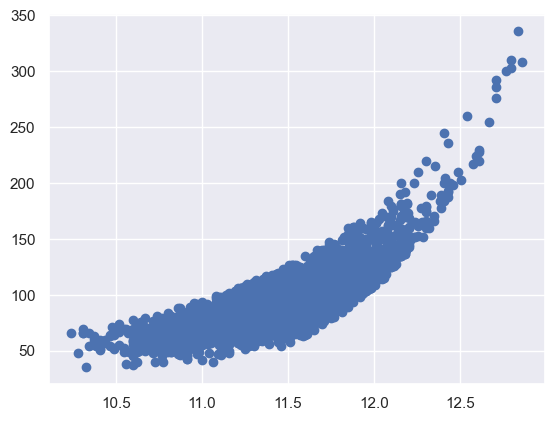

In [127]:
log_price = np.log(df_filtered['price'])

plt.scatter(log_price, df_filtered['gross_area'])

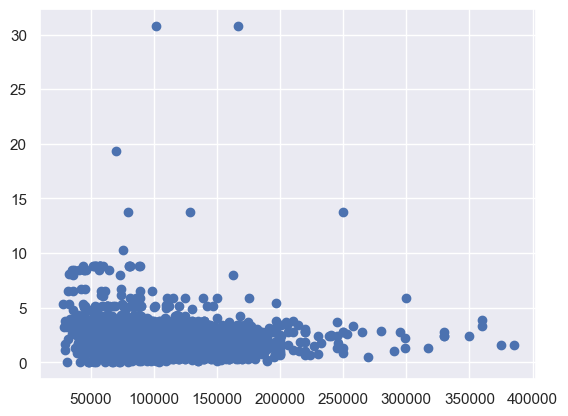

In [128]:
plt.scatter(df_filtered['price'], df_filtered['distance_from_center'])

In [129]:
# Add a constant term for the intercept & define the x and y terms
x = sm.add_constant(data['distance_from_center'])
y = data['price']

# Fit the robust linear model
robust_model = RLM(y, sm.add_constant(x)).fit()

# getting the residuals
robust_residuals = robust_model.resid

# Calculate the median absolute deviation (MAD)
MAD = np.median(np.abs(robust_residuals))

# Set a threshold for outliers
threshold = 3 * MAD  # Adjust as needed

# Identify outliers based on the threshold
outliers = np.abs(robust_residuals) > threshold

# Remove outliers from the DataFrame
df_filtered = df_filtered[~outliers]

C:\Users\DU952LT\AppData\Local\Temp\ipykernel_19228\662944746.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[~outliers]


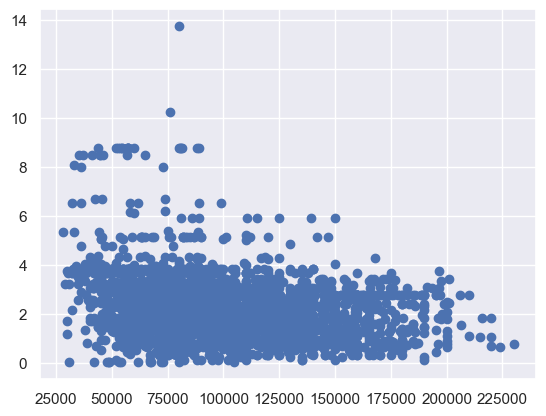

In [130]:
plt.scatter(df_filtered['price'], df_filtered['distance_from_center'])

In [131]:
df_filtered.columns

Index(['gross_area', 'year', 'floor', 'bathrooms', 'bedrooms', 'furnished',
       'balcony', 'mortgage', 'status', 'address', 'comments', 'lat', 'lon',
       'orientation', 'storehouse', 'parquet', 'surveillance_system',
       'air_conditioner', 'chimney', 'natural_light', 'termoizolation',
       'capot_system', 'acoustic', 'façade', 'solar_panel', 'Area', 'price',
       'distance_from_center', 'P/Meter', 'Has_Parking', 'Has_Elevator'],
      dtype='object')

# Mapping all type(features)=str into int

In [132]:
df_filtered['Has_Elevator'] = df_filtered['Has_Elevator'].map({False:0, True:1})
df_filtered['Has_Parking'] = df_filtered['Has_Parking'].map({False:0, True:1})
df_filtered

C:\Users\DU952LT\AppData\Local\Temp\ipykernel_19228\3201444349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Has_Elevator'] = df_filtered['Has_Elevator'].map({False:0, True:1})
C:\Users\DU952LT\AppData\Local\Temp\ipykernel_19228\3201444349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Has_Parking'] = df_filtered['Has_Parking'].map({False:0, True:1})


,gross_area,year,floor,bathrooms,bedrooms,furnished,balcony,mortgage,status,address,...,capot_system,acoustic,façade,solar_panel,Area,price,distance_from_center,P/Meter,Has_Parking,Has_Elevator
1,160.0,2000.0,1,2,3,0,0,0,pallat I vjeter,"Myslym Shyri - Myslym Shyri - Myslym Shyri, Sh...",...,0,0,0,0,4,224000,0.623884,1400.000000,0,0
3,130.5,2021.0,2,2,2,0,1,1,I PaPerfunduar,"Rruga e Dafinave - Fusha e Aviacionit, Shqipëri",...,0,0,1,0,4,156000,2.751477,1195.402299,1,1
4,131.7,2021.0,2,2,2,0,1,1,I PaPerfunduar,"Rruga e Dafinave - Fusha e Aviacionit, Shqipëri",...,0,0,1,0,4,159000,2.751477,1207.289294,1,1
7,55.0,1989.0,2,1,1,0,1,1,pallat I vjeter,Rruga e Durrësit - Rruga Durresit - Qendër - K...,...,0,0,0,0,1,75000,0.303436,1363.636364,0,0
8,139.0,2001.0,3,2,3,1,1,1,pallat I vjeter,"Irfan Tomini - Selitë - Pallati me Shigjeta, S...",...,0,0,0,0,4,148000,1.915622,1064.748201,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3834,150.0,2008.0,1,2,2,1,0,1,pallat I ri,"liqeni i thate,Tirane,Albania",...,0,0,0,0,4,160000,2.769961,1066.666667,1,1
3835,93.0,1977.0,5,1,2,0,1,0,pallat I vjeter,"Sheshi Willson, Tirana",...,0,0,0,0,1,135000,1.115610,1451.612903,0,0
3837,135.0,1977.0,4,2,3,1,1,1,pallat I vjeter,EJA Studio Tirana,...,0,0,0,0,3,120000,3.202303,888.888889,0,0
3838,76.0,2006.0,7,1,1,0,1,0,pallat I ri,"Dogana, Tirana",...,0,1,1,0,4,68400,3.006369,900.000000,0,0


# Train Test Split

In [189]:
# Pulling out all the significant features
df_final = df_filtered[['price', 'year', 'Has_Parking', 'Has_Elevator', 'distance_from_center', 'Area', 'gross_area']]
df_final.columns

Index(['price', 'year', 'Has_Parking', 'Has_Elevator', 'distance_from_center',
       'Area', 'gross_area'],
      dtype='object')

In [291]:
# Separating the x and y for the model fit. 
x = df_final[['gross_area','year', 'Has_Parking', 'Has_Elevator', 'distance_from_center']] # ,'Area'
y = df_final['price'] 
y = pd.DataFrame(y)

In [292]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Scaling the data

In [293]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
# y_train_scaled = scaler.transform(y_train)
# y_test_scaled = scaler.transform(y_test)

# MODEL

In [327]:
# Specifying the model
tree1  = DecisionTreeRegressor(min_samples_split=50)

In [328]:
# Fitting the model
tree1.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_split=50)

In [329]:
# Making the prediction
results = tree1.predict(x_test)

In [330]:
# Getting the R2
r_squared_test = r2_score(results, y_test)
r_squared_test

0.7144484593913583

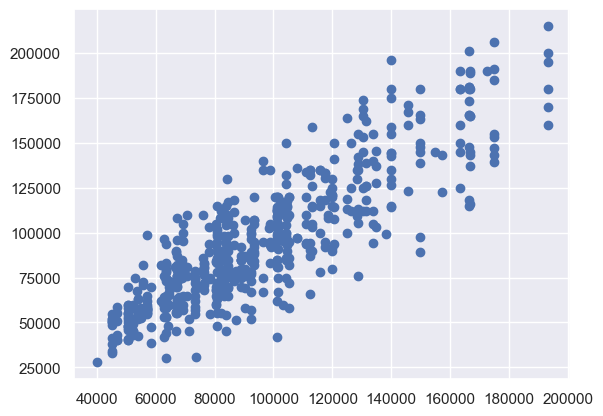

In [331]:
plt.scatter(results, y_test)